In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
import numpy as np
import seaborn as sns

In [2]:
csv_path = 'Subject6_smoking.csv'
df = pd.read_csv(csv_path)

In [3]:
living_smoking_women = df[(df['Status'] == 'Alive') & (df['Smoker'] == 'Yes')].shape[0]
dead_smoking_women = df[(df['Status'] == 'Dead') & (df['Smoker'] == 'Yes')].shape[0]
living_non_smoking_women = df[(df['Status'] == 'Alive') & (df['Smoker'] == 'No')].shape[0]
dead_non_smoking_women = df[(df['Status'] == 'Dead') & (df['Smoker'] == 'No')].shape[0]

results_df = pd.DataFrame({
    'Category': ['Living Smoking Women', 'Dead Smoking Women', 'Living Non-Smoking Women', 'Dead Non-Smoking Women'],
    'Total Number': [living_smoking_women, dead_smoking_women, living_non_smoking_women, dead_non_smoking_women]
})

results_df

Category  Total Number
0      Living Smoking Women           443
1        Dead Smoking Women           139
2  Living Non-Smoking Women           502
3    Dead Non-Smoking Women           230

In [4]:
colors = ['#ffb3e6', '#c2f0c2', '#ffe6cc', '#ff9999']
plt.figure(figsize=(8, 8))
plt.pie(results_df['Total Number'], labels=results_df['Category'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Women based on Smoking Habits and Status')
plt.show()

In [5]:
smoking_women = df[(df['Smoker'] == 'Yes')].shape[0]
smoking_mortality_rate = dead_smoking_women / smoking_women
smoking_mortality_rate

0.23883161512027493

In [6]:
non_smoking_women = df[(df['Smoker'] == 'No')].shape[0]
non_smoking_mortality_rate = dead_non_smoking_women / non_smoking_women
non_smoking_mortality_rate

0.31420765027322406

In [7]:
mortality_rates_df = pd.DataFrame({
    'Category': ['Smoking Women', 'Non-Smoking Women'],
    'Mortality Rate': [smoking_mortality_rate, non_smoking_mortality_rate]
})
plt.figure(figsize=(6, 6))
plt.bar(mortality_rates_df['Category'], mortality_rates_df['Mortality Rate'], color=['#ff9999', '#c2f0c2'], width=0.3)
plt.ylabel('Mortality Rate')
plt.title('Mortality Rate Comparison between Smoking and Non-Smoking Women')
plt.show()

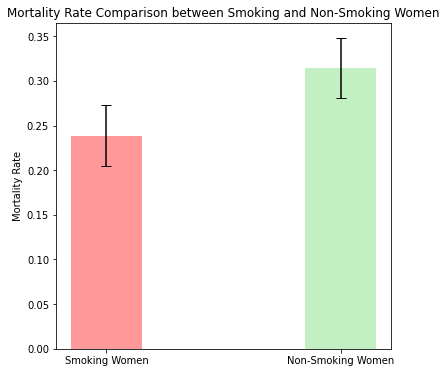

In [8]:
def calculate_confidence_interval(success_count, total_count, confidence_level=0.95):
    lower_ci, upper_ci = proportion_confint(success_count, total_count, alpha=1-confidence_level)
    return lower_ci, upper_ci

smoking_lower_ci, smoking_upper_ci = calculate_confidence_interval(dead_smoking_women, smoking_women)
non_smoking_lower_ci, non_smoking_upper_ci = calculate_confidence_interval(dead_non_smoking_women, non_smoking_women)

# Create a DataFrame for plotting
mortality_rates_df = pd.DataFrame({
    'Category': ['Smoking Women', 'Non-Smoking Women'],
    'Mortality Rate': [smoking_mortality_rate, non_smoking_mortality_rate],
    'Lower CI': [smoking_lower_ci, non_smoking_lower_ci],
    'Upper CI': [smoking_upper_ci, non_smoking_upper_ci]
})

# Plot the values with confidence intervals in a bar chart
plt.figure(figsize=(6, 6))
plt.bar(mortality_rates_df['Category'], mortality_rates_df['Mortality Rate'], yerr=[
        mortality_rates_df['Mortality Rate'] - mortality_rates_df['Lower CI'],
        mortality_rates_df['Upper CI'] - mortality_rates_df['Mortality Rate']
    ], capsize=5, color=['#ff9999', '#c2f0c2'], width=0.3)
plt.ylabel('Mortality Rate')
plt.title('Mortality Rate Comparison between Smoking and Non-Smoking Women')
plt.show()


The mortality rate in the group of non-smoking women is higher than that for smoking women. This result is surprising because we would expect the opposite, as smoking is known to be detrimental to health

In [9]:
# Define age categories
bins = [18, 34, 54, 64, 200]
labels = ['18-34 years', '34-54 years', '55-64 years', 'over 65 years']

# Categorize the ages
df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df

Smoker Status   Age   Age_Category
0       Yes  Alive  21.0    18-34 years
1       Yes  Alive  19.3    18-34 years
2        No   Dead  57.5    55-64 years
3        No  Alive  47.1    34-54 years
4       Yes  Alive  81.4  over 65 years
...     ...    ...   ...            ...
1309    Yes  Alive  35.9    34-54 years
1310     No  Alive  22.3    18-34 years
1311    Yes   Dead  62.1    55-64 years
1312     No   Dead  88.6  over 65 years
1313     No  Alive  39.1    34-54 years

[1314 rows x 4 columns]

In [10]:
df['Is_Dead'] = df['Status'] == 'Dead'
df['Is_Smoker'] = df['Smoker'] == 'Yes'

# Group by Age_Category and calculate counts
result = df.groupby('Age_Category').agg(
    Dead_Smoker=pd.NamedAgg(column='Is_Dead', aggfunc=lambda x: sum(x & df['Is_Smoker'])),
    Dead_Non_Smoker=pd.NamedAgg(column='Is_Dead', aggfunc=lambda x: sum(x & ~df['Is_Smoker'])),
    Alive_Smoker=pd.NamedAgg(column='Is_Dead', aggfunc=lambda x: sum(~x & df['Is_Smoker'])),
    Alive_Non_Smoker=pd.NamedAgg(column='Is_Dead', aggfunc=lambda x: sum(~x & ~df['Is_Smoker']))
).reset_index()

print(result)

# Plot the result
ax = result.plot(x='Age_Category', kind='bar', title='number by Age Category and Smoker Status')
ax.legend(['Dead_Smoker', 'Dead_Non_Smoker', 'Alive_Smoker', 'Alive_Non_Smoker'])
plt.xlabel('Age Category')
plt.ylabel('Number')
plt.show()

    Age_Category  Dead_Smoker  Dead_Non_Smoker  Alive_Smoker  Alive_Non_Smoker
0    18-34 years            5                6           174               213
1    34-54 years           41               19           198               180
2    55-64 years           51               39            64                80
3  over 65 years           42              166             7                29


In [11]:
result

Age_Category  Dead_Smoker  Dead_Non_Smoker  Alive_Smoker  Alive_Non_Smoker
0    18-34 years            5                6           174               213
1    34-54 years           41               19           198               180
2    55-64 years           51               39            64                80
3  over 65 years           42              166             7                29

    Age_Category  Dead_Smoker_Ratio  Dead_Non_Smoker_Ratio
0    18-34 years           0.027933               0.027397
1    34-54 years           0.171548               0.095477
2    55-64 years           0.443478               0.327731
3  over 65 years           0.857143               0.851282


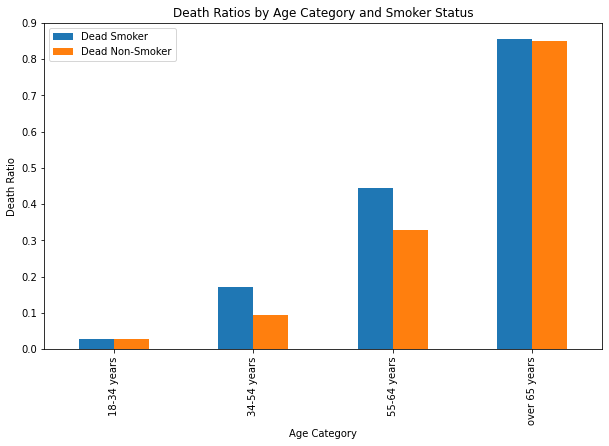

In [12]:
# Calculate the ratios
result['Dead_Smoker_Ratio'] = result['Dead_Smoker'] / (result['Dead_Smoker'] + result['Alive_Smoker'])
result['Dead_Non_Smoker_Ratio'] = result['Dead_Non_Smoker'] / (result['Dead_Non_Smoker'] + result['Alive_Non_Smoker'])

# Display the result
print(result[['Age_Category', 'Dead_Smoker_Ratio', 'Dead_Non_Smoker_Ratio']])
fig, ax = plt.subplots(figsize=(10, 6))

result.plot(x='Age_Category', y=['Dead_Smoker_Ratio', 'Dead_Non_Smoker_Ratio'], kind='bar', ax=ax)
plt.title('Death Ratios by Age Category and Smoker Status')
plt.xlabel('Age Category')
plt.ylabel('Death Ratio')
plt.legend(['Dead Smoker', 'Dead Non-Smoker'])
plt.show()

The result is surprising because, when we considered the age categories, the outcomes (death ratio) were opposite to those obtained when these subgroups were aggregated

In [13]:
#1 if the person died in 20-year period
df['Death'] = (df['Is_Dead'] & (df['Age_Category'] == '18-34 years')).astype(int)
df = pd.get_dummies(df, columns=['Smoker'], drop_first=True)
df

Status   Age   Age_Category  Is_Dead  Is_Smoker  Death  Smoker_Yes
0     Alive  21.0    18-34 years    False       True      0           1
1     Alive  19.3    18-34 years    False       True      0           1
2      Dead  57.5    55-64 years     True      False      0           0
3     Alive  47.1    34-54 years    False      False      0           0
4     Alive  81.4  over 65 years    False       True      0           1
...     ...   ...            ...      ...        ...    ...         ...
1309  Alive  35.9    34-54 years    False       True      0           1
1310  Alive  22.3    18-34 years    False      False      0           0
1311   Dead  62.1    55-64 years     True       True      0           1
1312   Dead  88.6  over 65 years     True      False      0           0
1313  Alive  39.1    34-54 years    False      False      0           0

[1314 rows x 7 columns]

In [14]:
# Separate the data into two groups: smokers and non-smokers
df_smokers = df[df['Smoker_Yes'] == 1]
df_non_smokers = df[df['Smoker_Yes'] == 0]

# Logistic regression for smokers
X_smokers = df_smokers['Age']
y_smokers = df_smokers['Death']
logit_model_smokers = sm.Logit(y_smokers, X_smokers)
result_smokers = logit_model_smokers.fit()

# Logistic regression for non-smokers
X_non_smokers = df_non_smokers['Age']
y_non_smokers = df_non_smokers['Death']
logit_model_non_smokers = sm.Logit(y_non_smokers, X_non_smokers)
result_non_smokers = logit_model_non_smokers.fit()

# Display logistic regression summaries
print("Logistic Regression Summary for Smokers:")
print(result_smokers.summary())

print("\nLogistic Regression Summary for Non-Smokers:")
print(result_non_smokers.summary())

Optimization terminated successfully.
         Current function value: 0.045972
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.041163
         Iterations 10
Logistic Regression Summary for Smokers:
                           Logit Regression Results                           
Dep. Variable:                  Death   No. Observations:                  582
Model:                          Logit   Df Residuals:                      581
Method:                           MLE   Df Model:                            0
Date:                Fri, 12 Jan 2024   Pseudo R-squ.:                 0.06981
Time:                        13:48:13   Log-Likelihood:                -26.756
converged:                       True   LL-Null:                       -28.764
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------

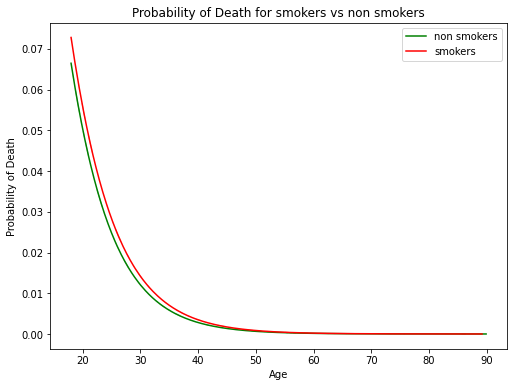

In [17]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='Age', y=result_non_smokers.predict(X_non_smokers),data=df_non_smokers, color='green', label='non smokers')
sns.lineplot(x='Age', y=result_smokers.predict(X_smokers),data=df_smokers, color='red', label='smokers')
plt.xlabel('Age')
plt.ylabel('Probability of Death')
plt.title('Probability of Death for smokers vs non smokers')
plt.legend()
plt.show()

We observe, according to the results of these regressions, that the probability of death at young ages is slightly lower for non smokers than smokers, which demonstrates the harmfulness of smoking